# Analyzing Profit Outcomes of 50 Startups on the basis of their R&D spending.

## Importing Libraries and Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
sd=pd.read_csv("C:/Users/ACHAL SHAH/Desktop/50Startups.csv")

## Data Exploration

In [3]:
sd.head()

,RD_Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
sd.describe()

,RD_Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Check for missing values if any

In [5]:
sd.isnull()

,RD_Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


## Drop unnecessary Data

In [6]:
sd1=sd[["RD_Spend","Profit"]]

## Data Vizualization 

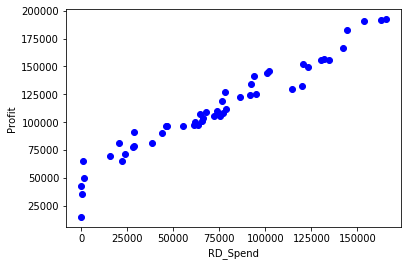

In [7]:
plt.scatter(sd1.RD_Spend, sd1.Profit,  color='blue')
plt.xlabel("RD_Spend")
plt.ylabel("Profit")
plt.show()

## Create Mask to split train set(80% Data) and test set(20% Data)

In [8]:
msk = np.random.rand(len(sd)) < 0.8
train = sd1[msk]
test = sd1[~msk]

## Implement Linear Regression model

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["RD_Spend"]])
train_y = np.asanyarray(train[["Profit"]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.84547291]]
Intercept:  [49425.93131072]


## Visualize train set

Text(0, 0.5, 'Profit')

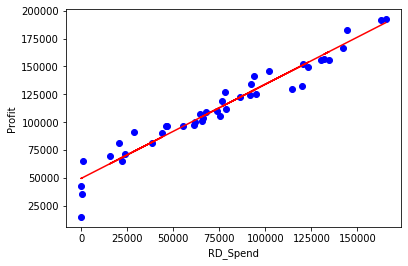

In [10]:
plt.scatter(train.RD_Spend, train.Profit,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("RD_Spend")
plt.ylabel("Profit")

## Evaluate test set 

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['RD_Spend']])
test_y = np.asanyarray(test[['Profit']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 6119.52
Residual sum of squares (MSE): 47100290.42
R2-score: 0.97


## Visualize test set 

Text(0, 0.5, 'Profit')

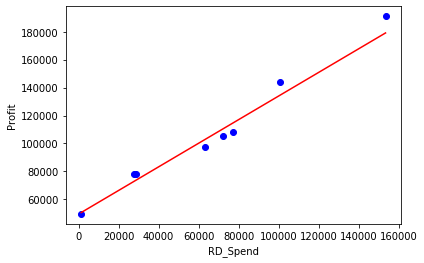

In [12]:
plt.scatter(test.RD_Spend, test.Profit,  color='blue')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("RD_Spend")
plt.ylabel("Profit")

## Predict Profit for any R&D spend say 95000

In [13]:
test_y_hat = regr.predict([[95000]])
test_y_hat

array([[129745.85795773]])

# Thank you!